In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import librosa
import librosa.display as ld
# Printa todos os valores do array
#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=10)
import pandas as pd
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import keras
import os
import re

/home/fernanda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
data_train = glob.glob('Novos_testes/Completa/Train/*.mp3')
print (len(data_train))

# data = glob.glob('Novos_testes/Contagens/Contagem_C_FP/*.mp3')
# print (len(data))
# print (data[0])


2024


In [9]:
def read_audios(data, n): #1, 0,2 0,5-0,75
    len_audios = []
    audios = []

    for file in data:
        #input()
        audio, sr = librosa.core.load(file, sr=22050)
        audio = (audio - np.mean(audio))/np.std(audio)
                       
        if n==1 or n==0.2:
            audio_1 = audio[0:int(len(audio)*n)]
            len_audios.append(len(audio_1))
            audios.append(audio_1)
        else:
            audio_1 = audio[0:int(len(audio)*0.2)]
            audio_5 = audio_1[0:int(len(audio_1)*n)]
            len_audios.append(len(audio_5))
            audios.append(audio_5)          
        
    max_audios = max(len_audios)
        
    return audios, max_audios

#To convert the hop length and frame size to units of seconds:
#print ("hop length[s]:", float(hop_length)/sr) # units of seconds
#print ("frame size[s]:",float(n_fft)/sr) # units of seconds

def my_specs(audios, max_audios):
    specs = []
    hop_length = 1024 
    n_fft = 2048 
    win_length = 2048
    #hop_length = 400
    #n_fft = 500
    
    #print ("hop length[s]:", float(hop_length)/sr) # units of seconds
    #print ("frame size[s]:",float(n_fft)/sr) # units of seconds

    for i in range(len(audios)):
        #shape = (max(len_audios))
        i_audio = np.array(audios[i])
        #i_audio.resize(shape)
        i_audio.resize(max_audios)
        x = librosa.stft(i_audio, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
        #X = librosa.amplitude_to_db(np.abs(x), ref=np.max)
        X = np.abs(x)
        specs.append(X)
        #audios_resize.append(i_audio)
    return specs

#Librosa.stft return:
#np.ndarray [shape=(1 + n_fft/2, t), dtype=dtype]

In [10]:
audios, max_audios = read_audios(data_train[0:2], 1) #1, 0,2 0,5-0,75
Specs = my_specs(audios, max_audios)

audios2, max_audios2 = read_audios(data_train[0:2], 0.2) #1, 0,2 0,5-0,75
Specs2 = my_specs(audios2, max_audios2)

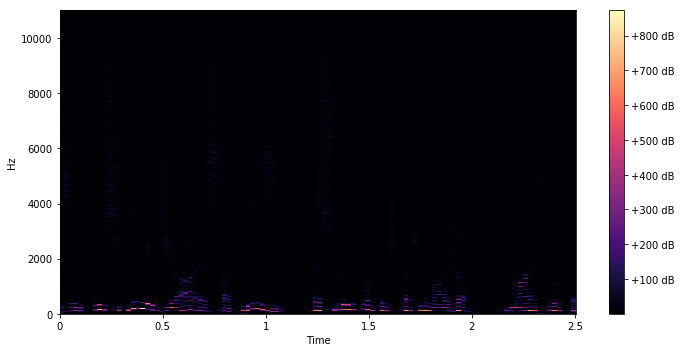

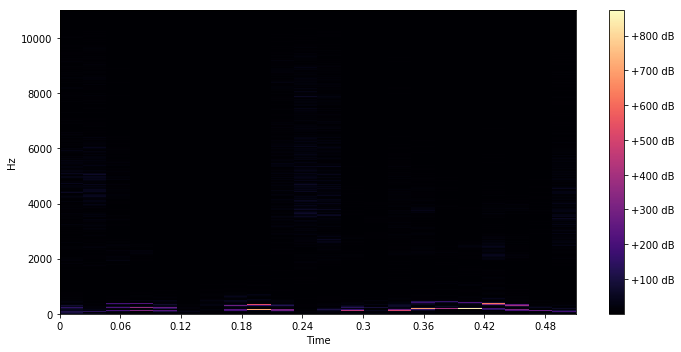

In [14]:
plt.figure(figsize=(10,5))
#print (Specs[s].shape)
ld.specshow(Specs[1], y_axis='linear', x_axis='time')
#plt.title(data[s], fontsize=16) 
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
#plt.savefig(data[s] + '.png')
plt.show()

plt.figure(figsize=(10,5))
#print (Specs[s].shape)
ld.specshow(Specs2[1], y_axis='linear', x_axis='time')
#plt.title(data[s], fontsize=16) 
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
#plt.savefig(data[s] + '.png')
plt.show()

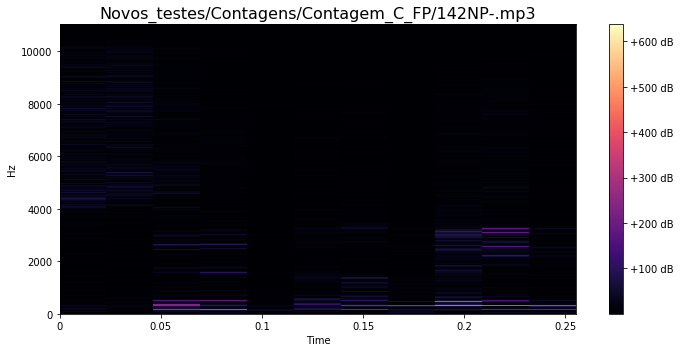

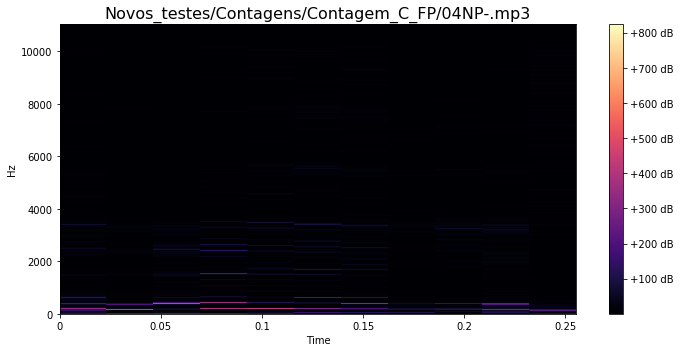

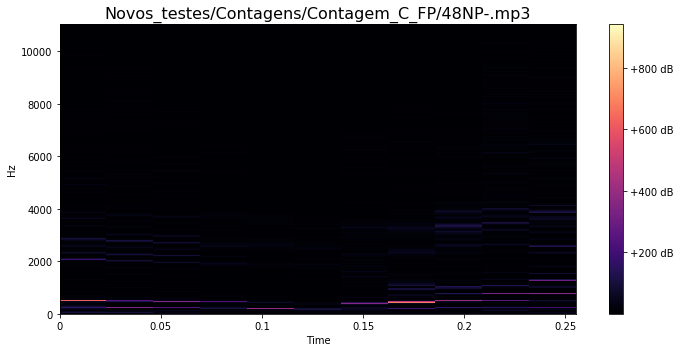

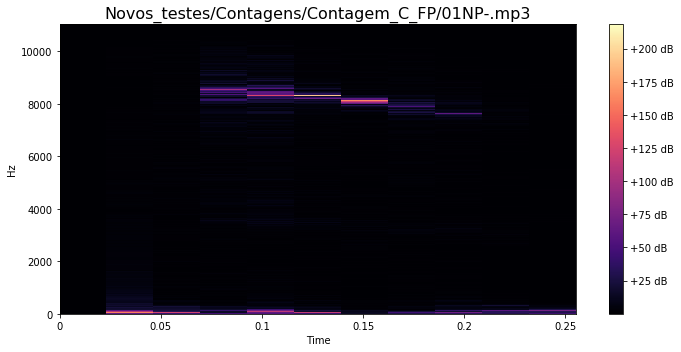

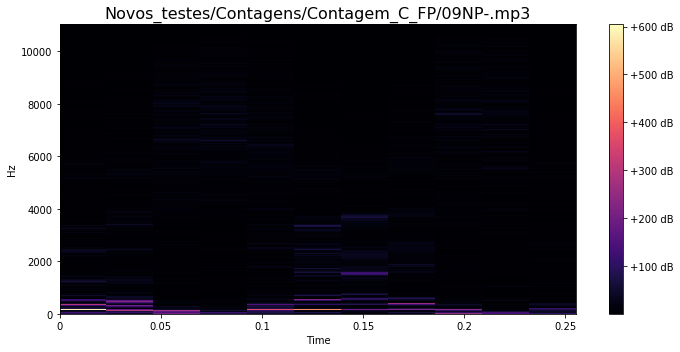

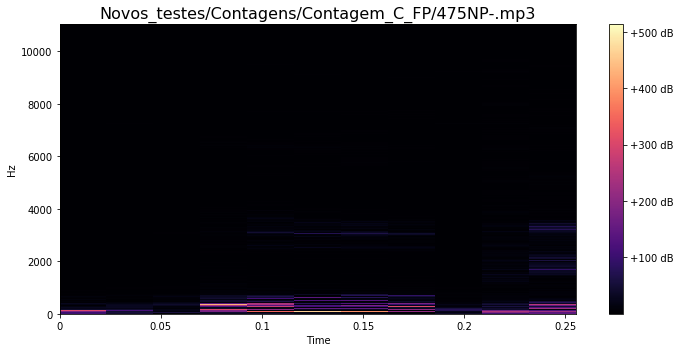

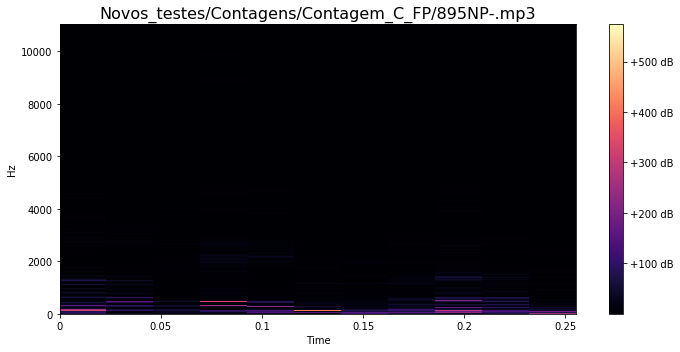

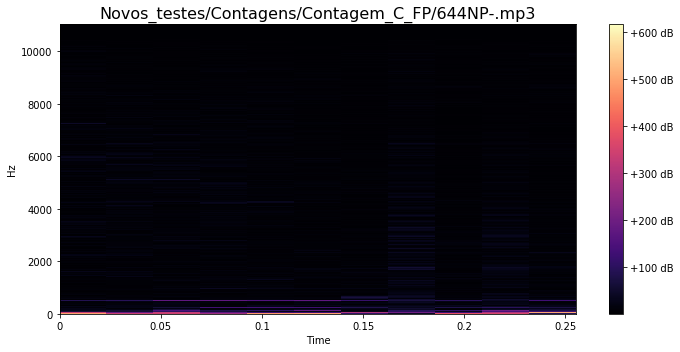

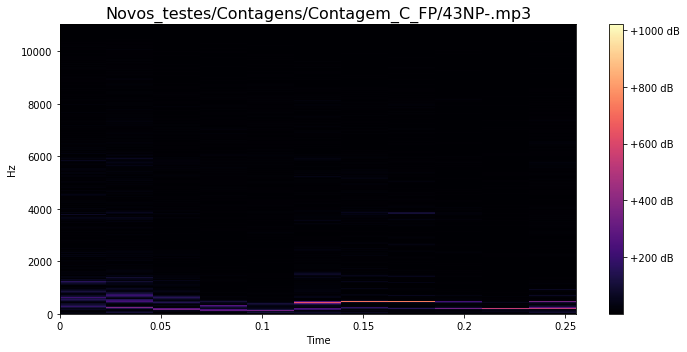

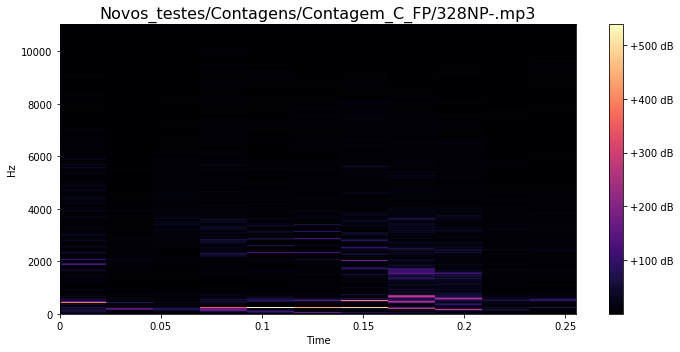

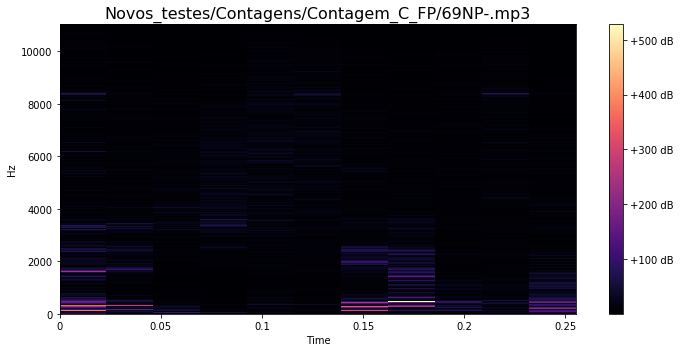

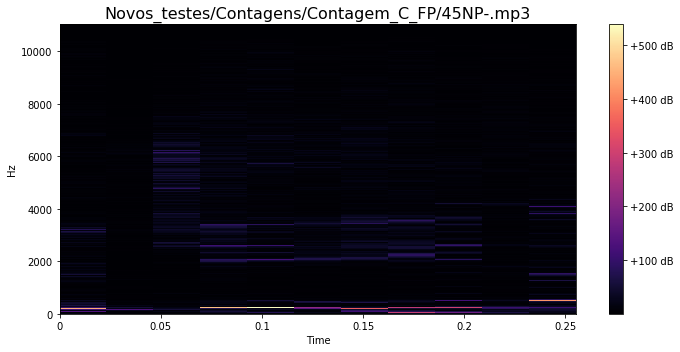

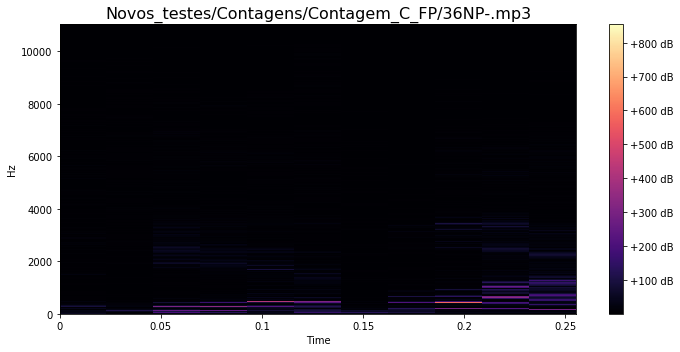

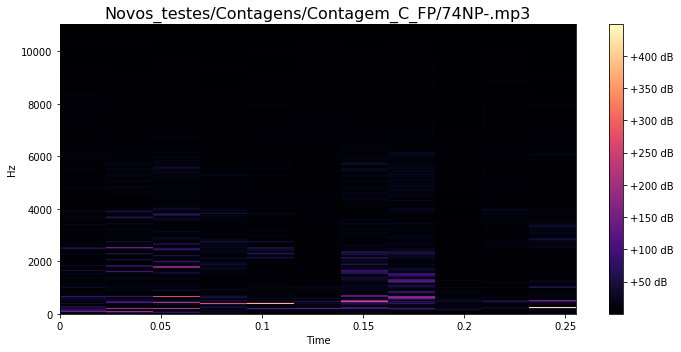

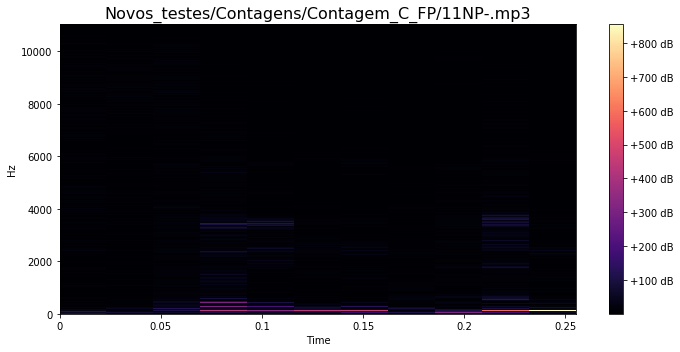

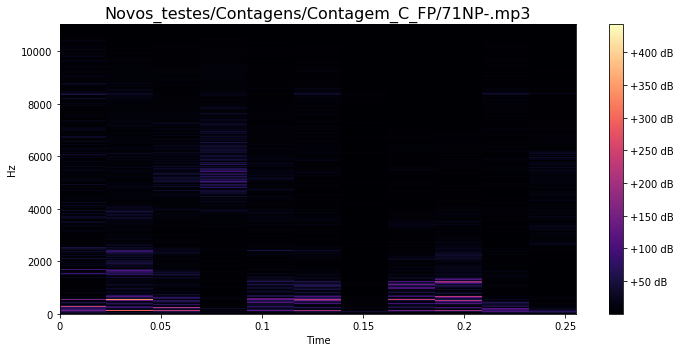

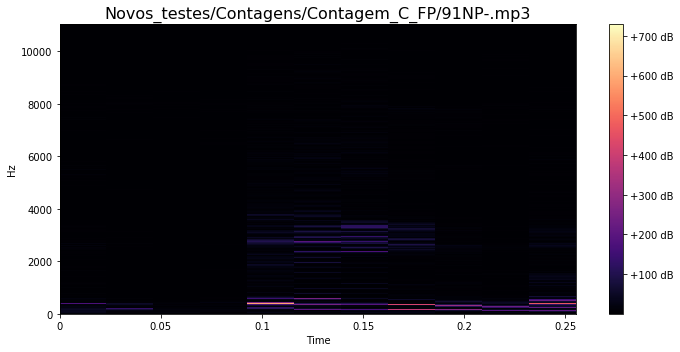

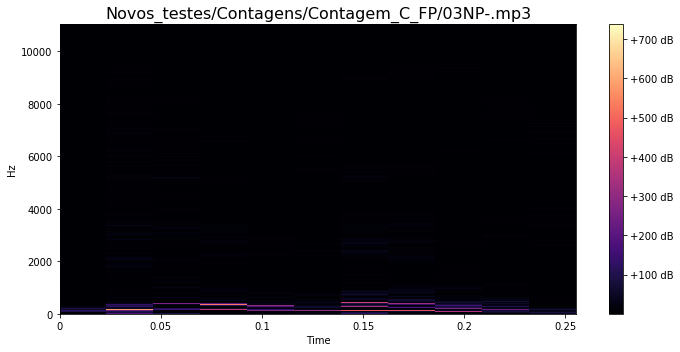

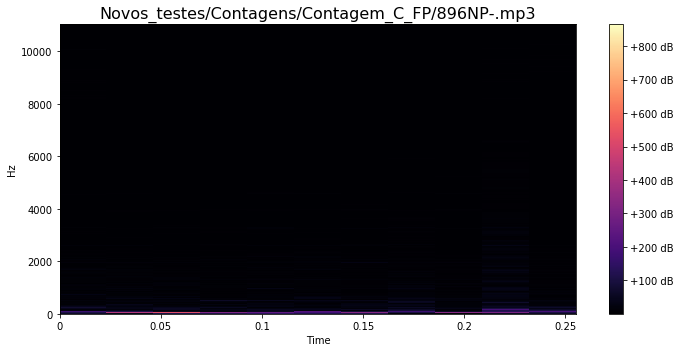

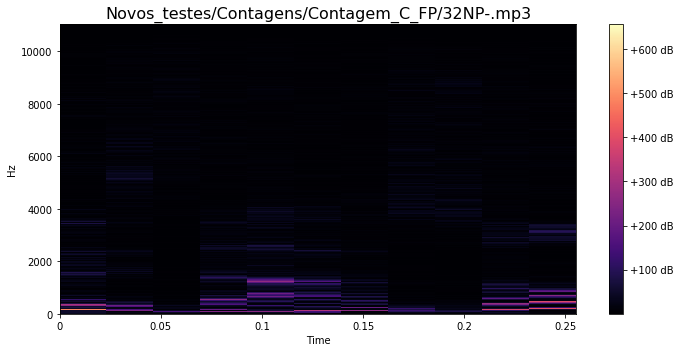

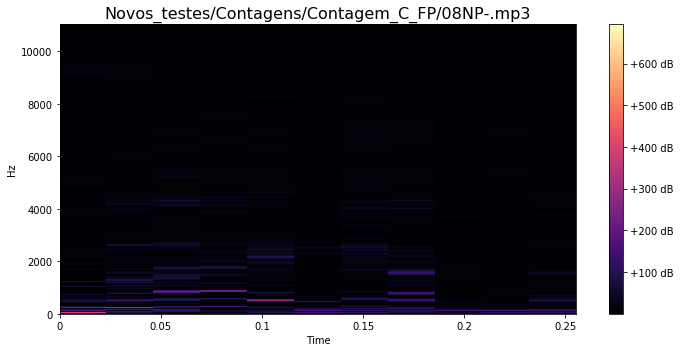

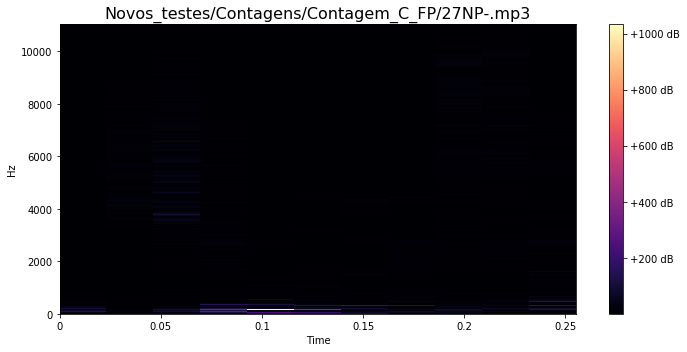

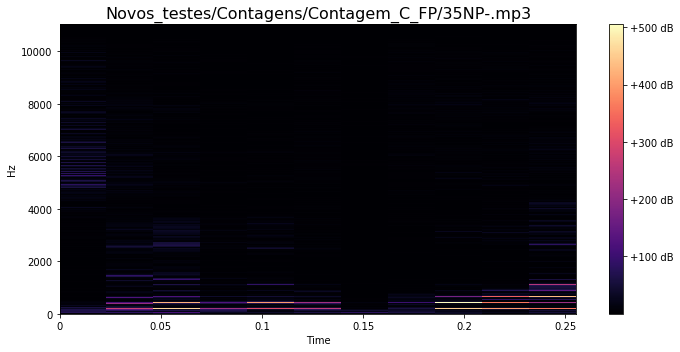

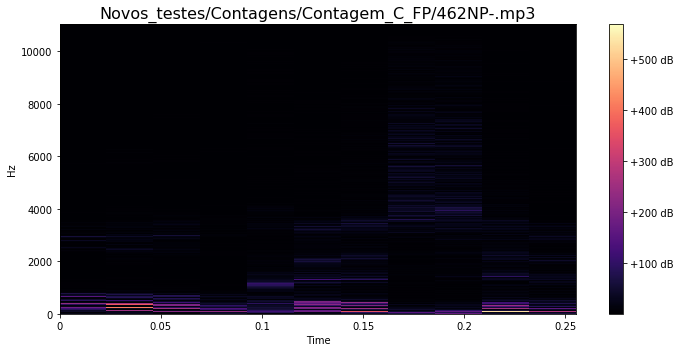

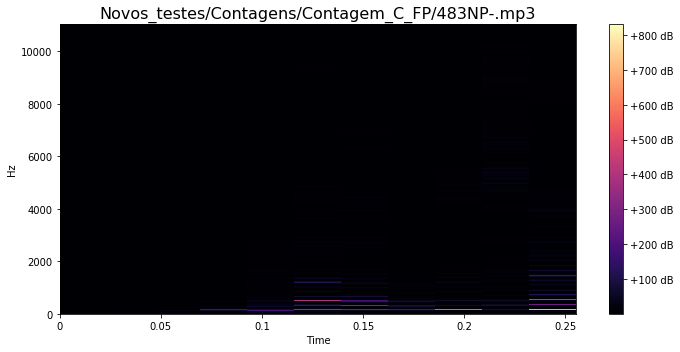

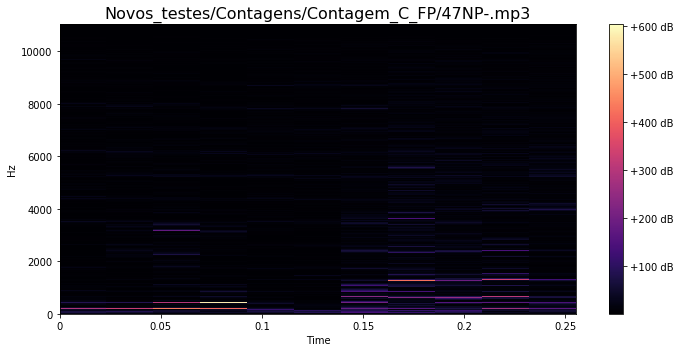

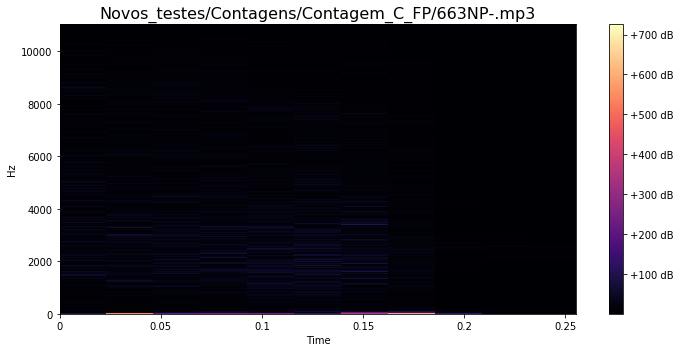

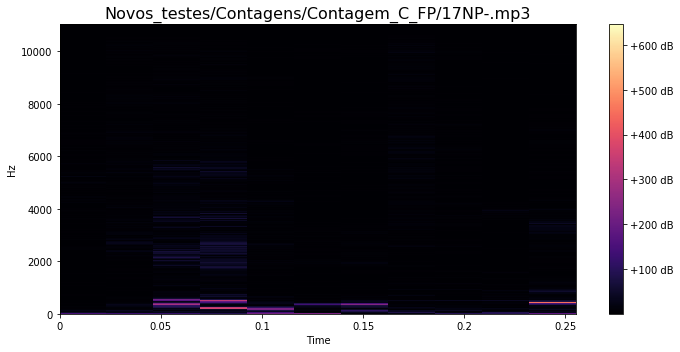

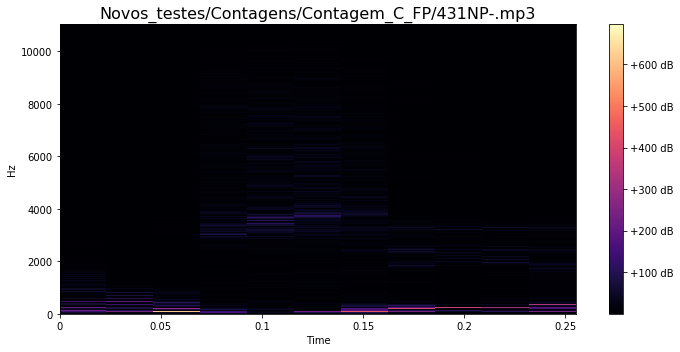

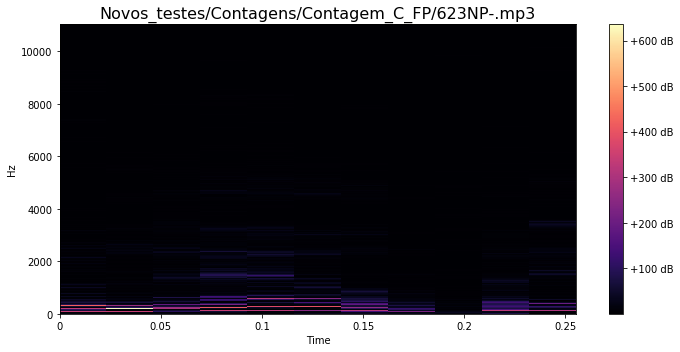

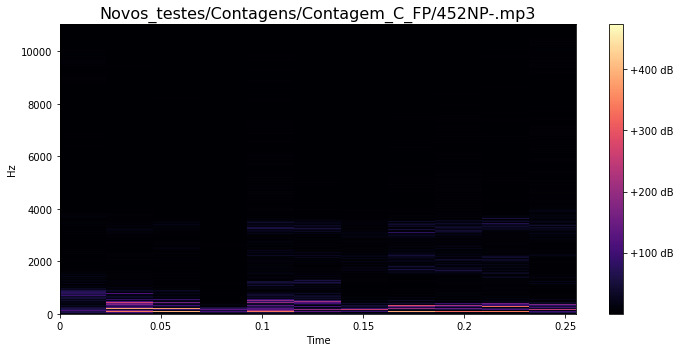

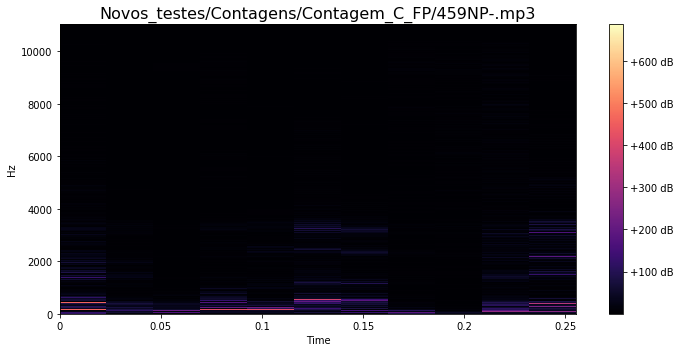

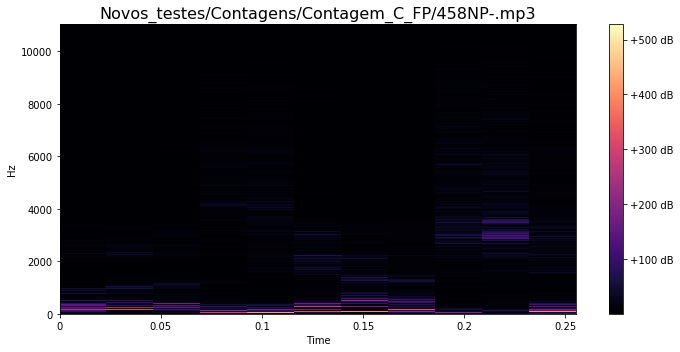

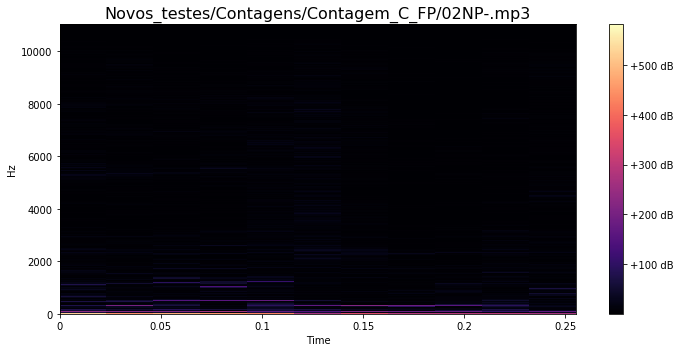

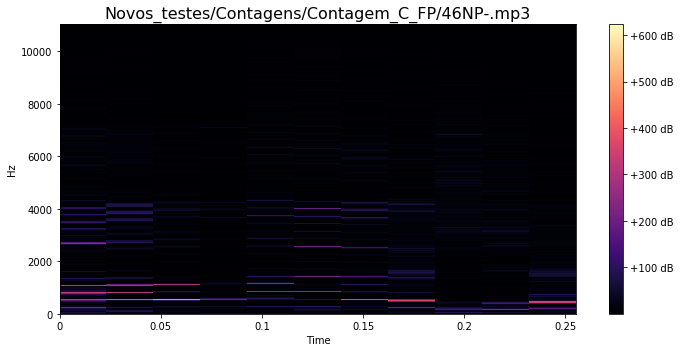

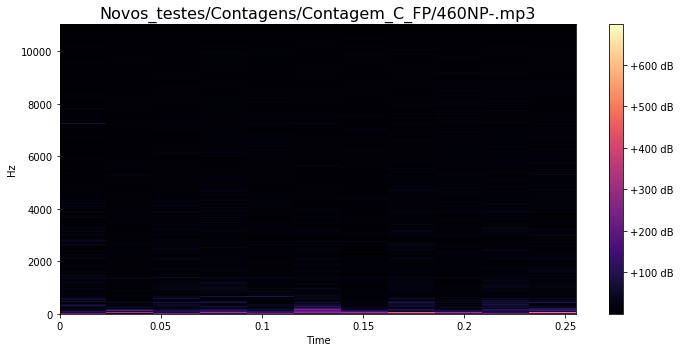

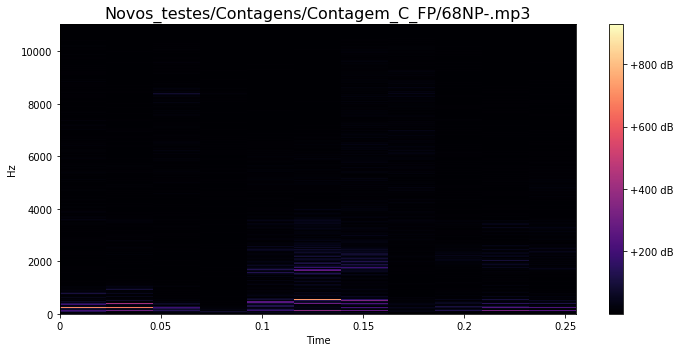

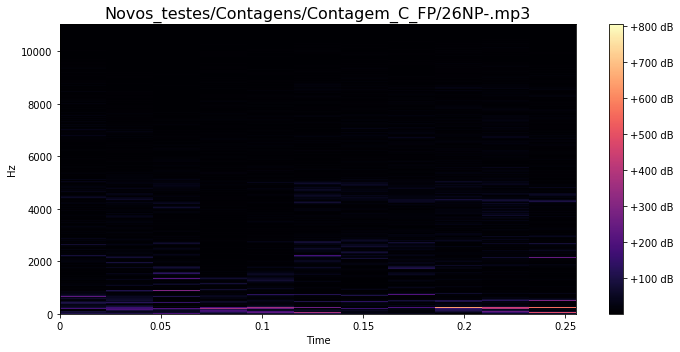

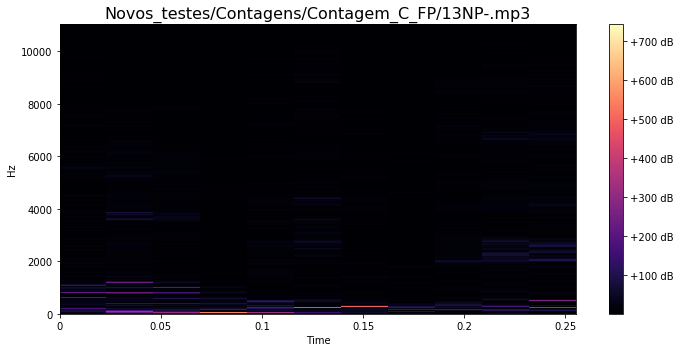

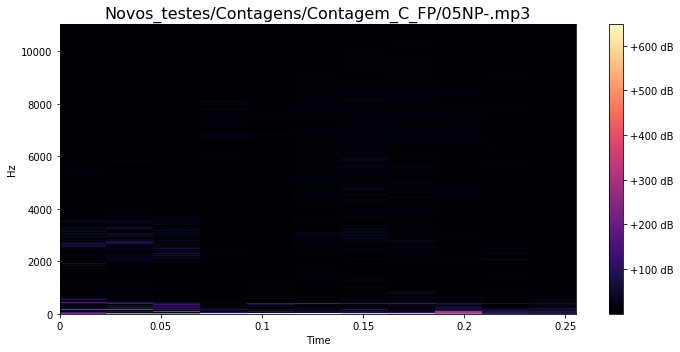

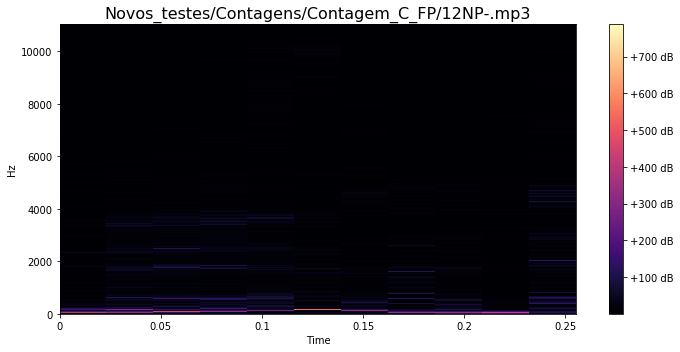

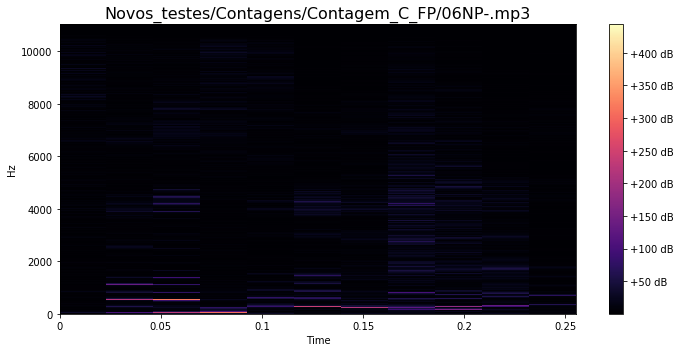

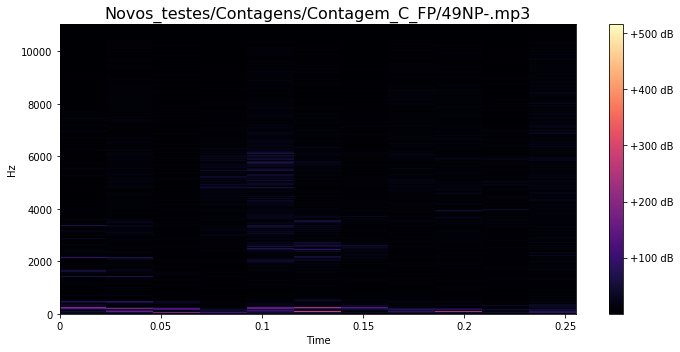

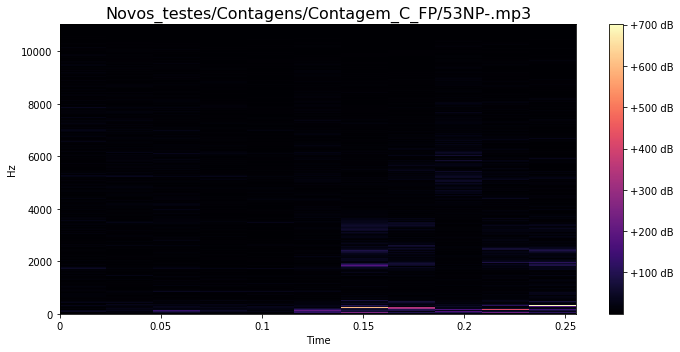

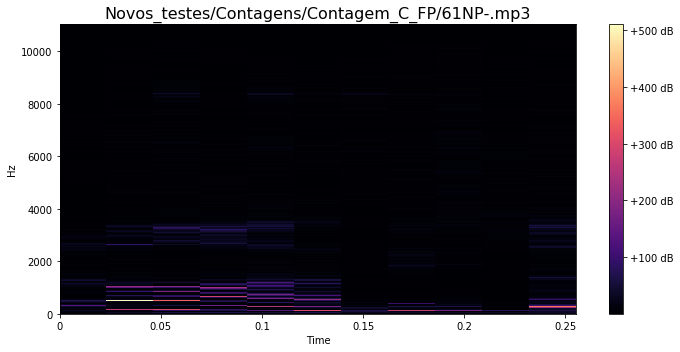

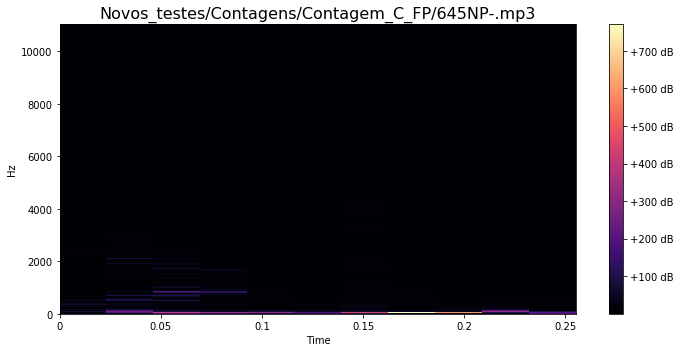

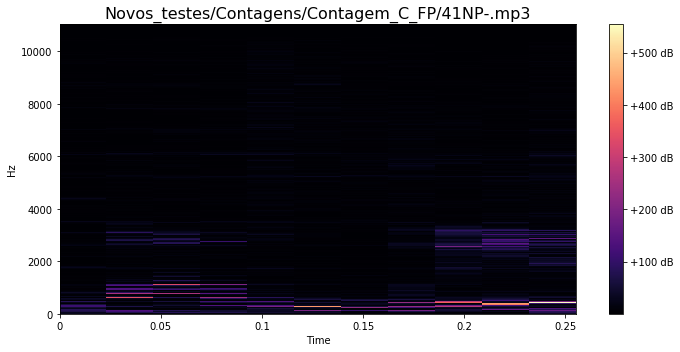

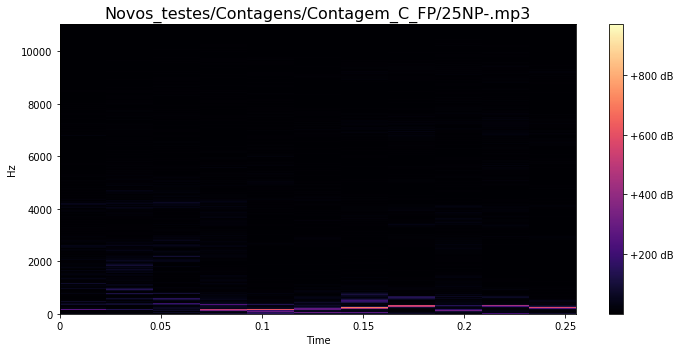

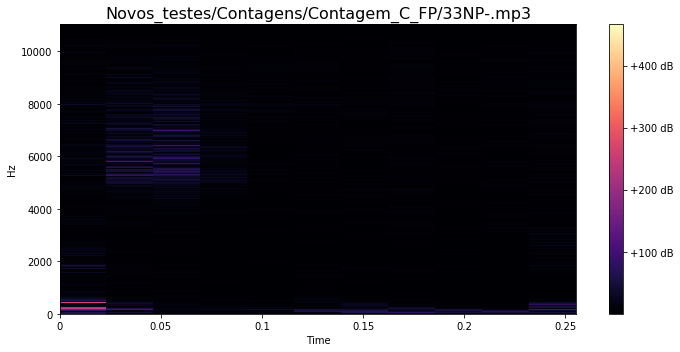

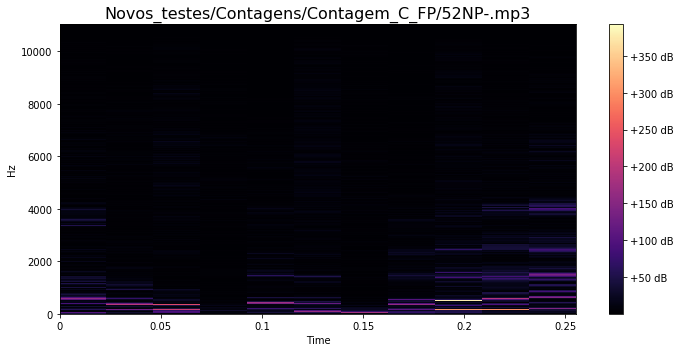

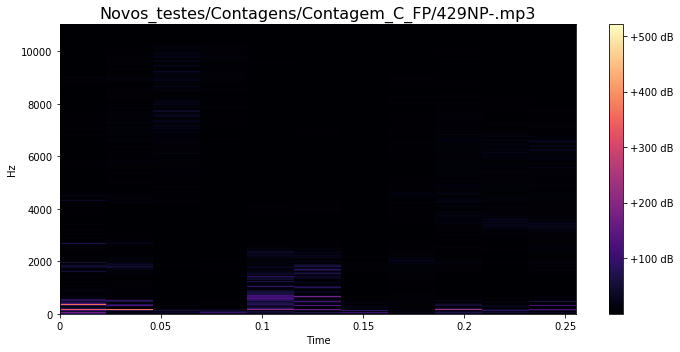

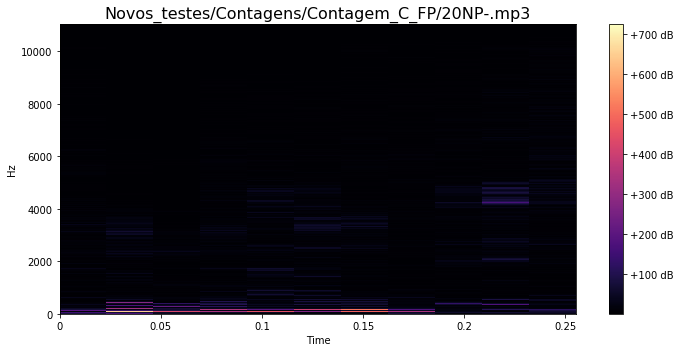

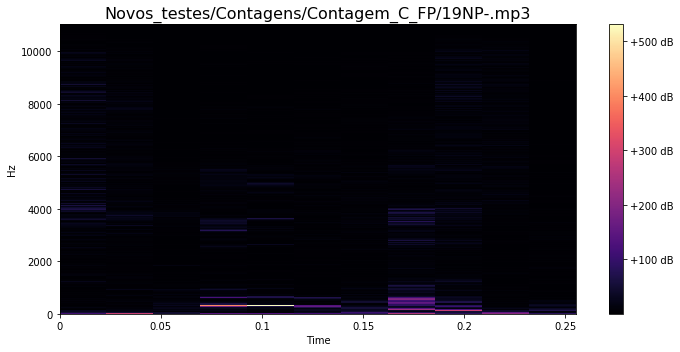

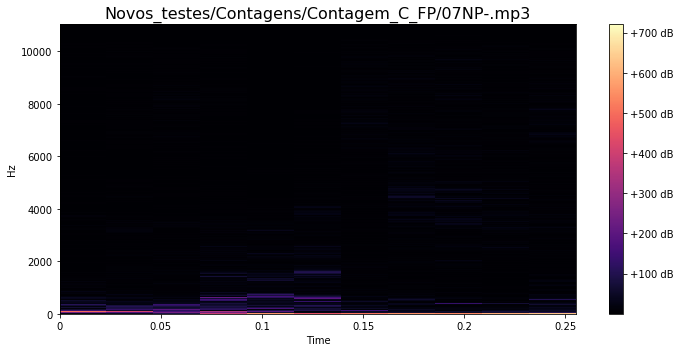

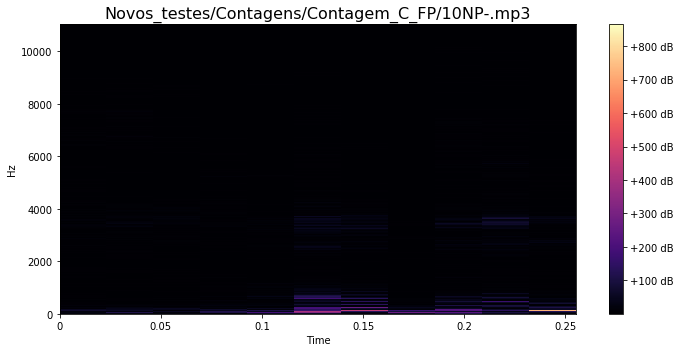

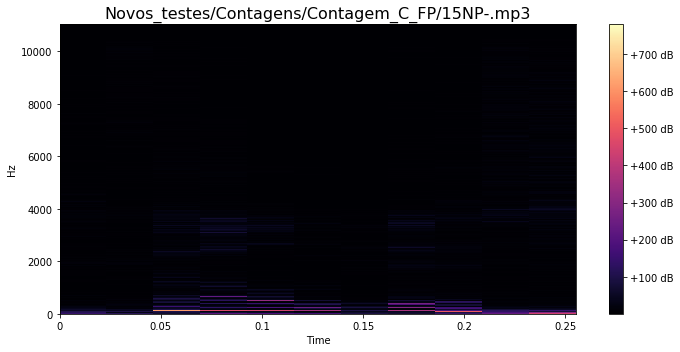

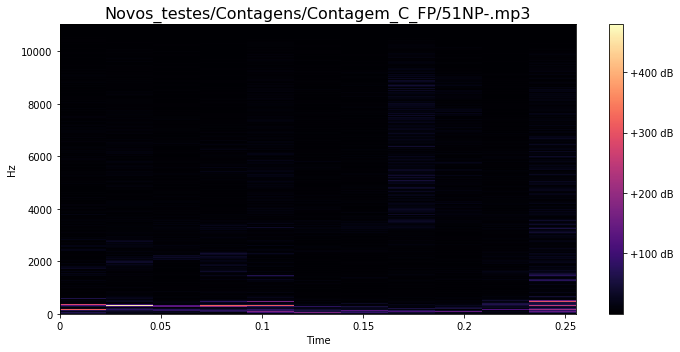

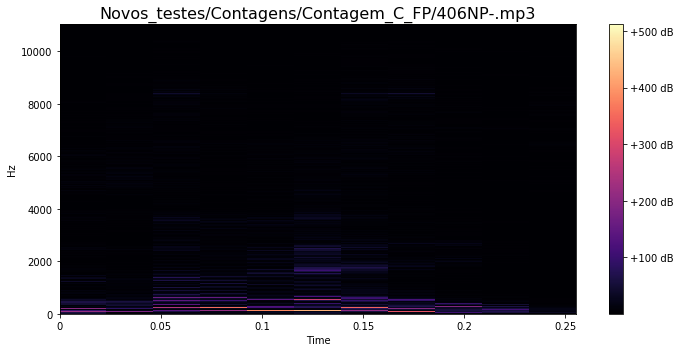

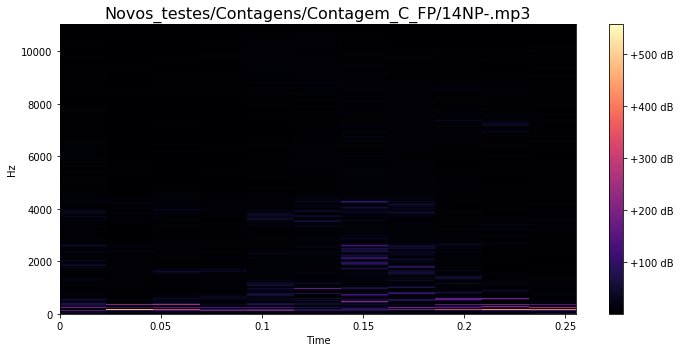

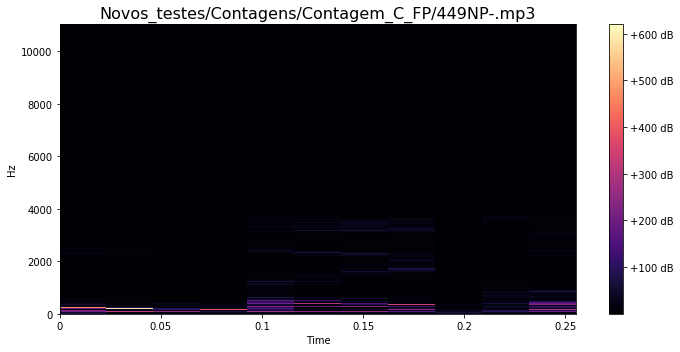

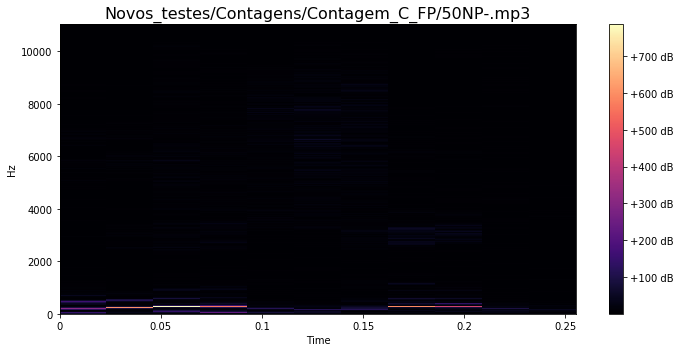

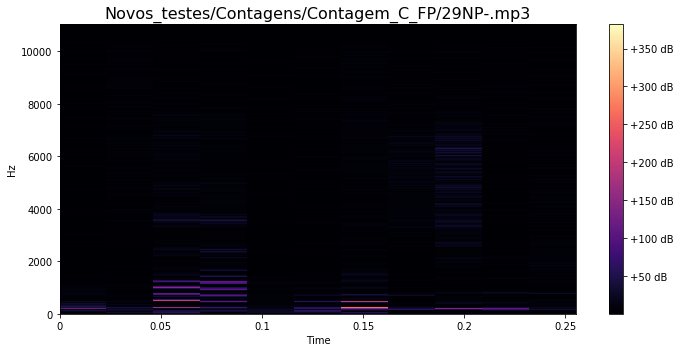

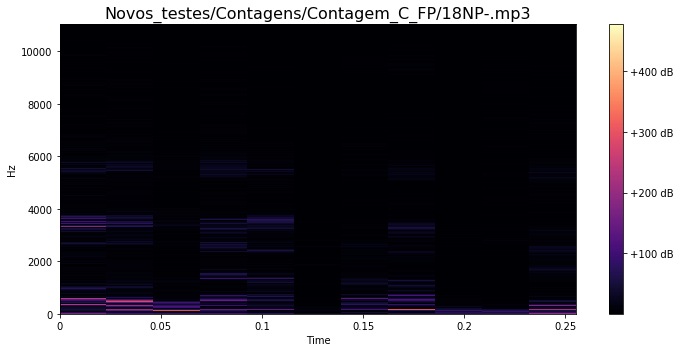

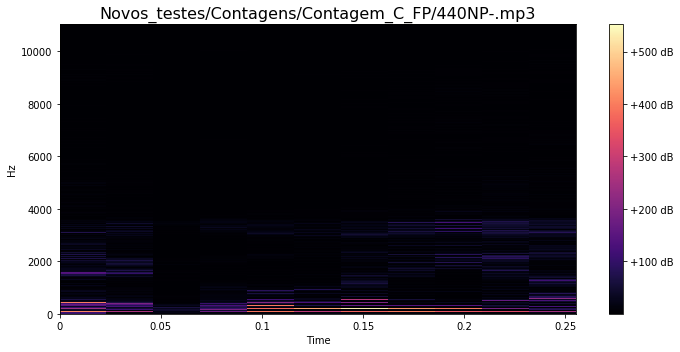

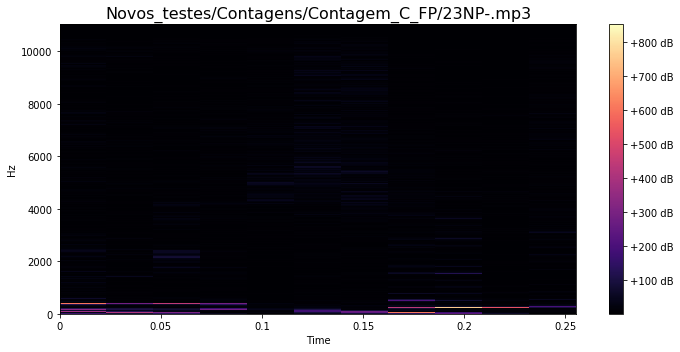

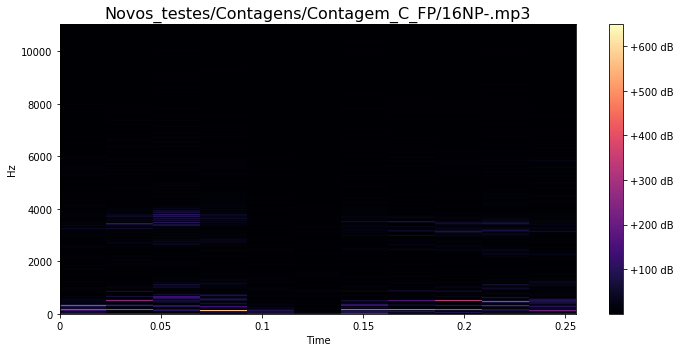

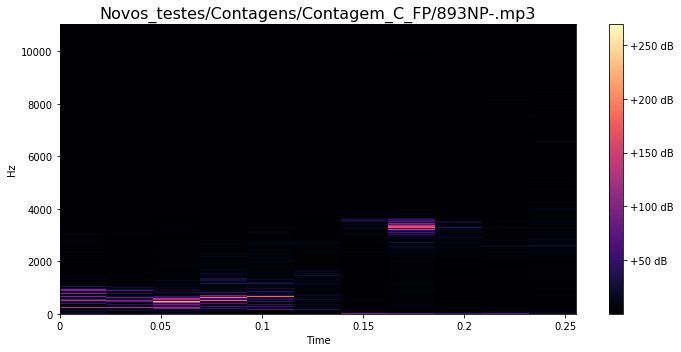

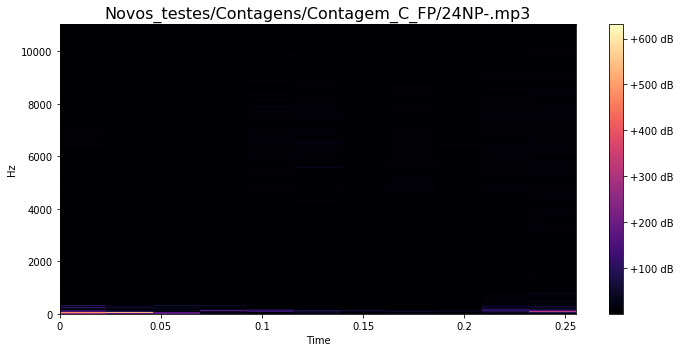

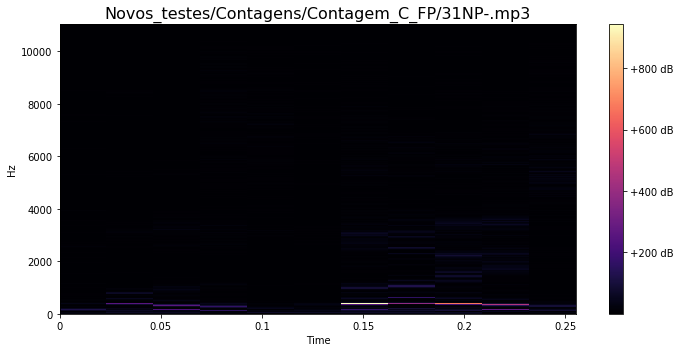

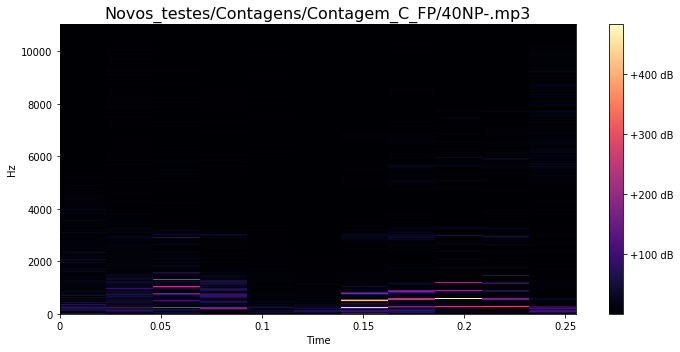

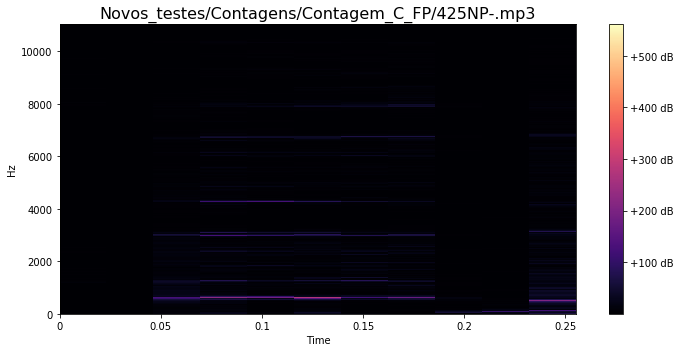

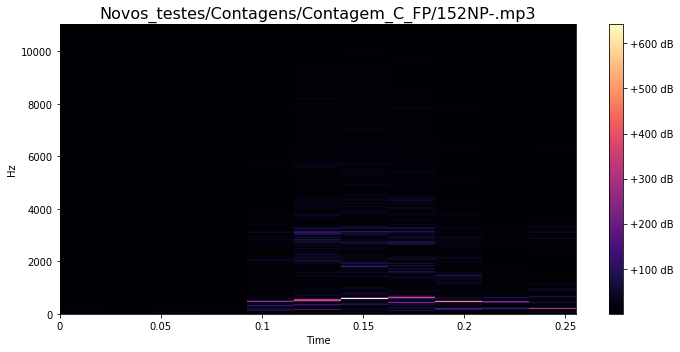

In [45]:
for s in range(len(Specs)):
    plt.figure(figsize=(10,5))
    #print (Specs[s].shape)
    ld.specshow(Specs[s], y_axis='linear', x_axis='time')
    plt.title(data[s], fontsize=16) 
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    #plt.savefig(data[s] + '.png')
    plt.show()